In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
theta = np.arange(-10, 10, 0.1)
ltheta = theta**2

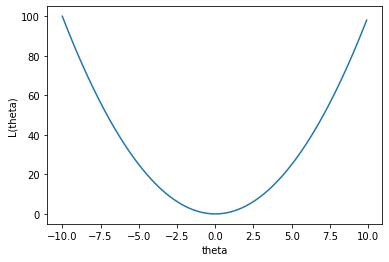

In [3]:
plt.plot(theta, ltheta)
plt.xlabel('theta')
plt.ylabel('L(theta)')
plt.show()

In [4]:
theta1, theta2 = np.meshgrid(np.arange(-30, 30, 0.1), np.arange(-30, 30, 0.1))
ltheta = theta1**2 + theta2**2

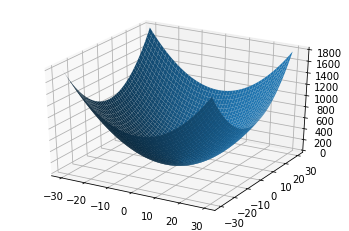

In [5]:

fig3d = plt.figure()
plt3d = fig3d.add_subplot(111, projection = '3d')
plt3d.plot_surface(theta1, theta2, ltheta)
plt.show()

(94, 2) (94, 1)


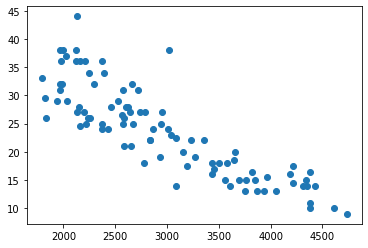

In [6]:
data = pd.read_excel('dat.xlsx')
x = np.array(data['x'])
plt.scatter(x, np.array(data['y']))
x = (x-np.mean(x))/np.std(x)
x = np.array([np.ones(len(x)), x]).transpose()
y = np.vstack(np.array(data['y']).transpose())
print(x.shape, y.shape)

In [7]:
def l_theta(theta, x, y):
    ltheta = sum((y-np.matmul(x, theta))**2)
    return ltheta

In [8]:
theta_optimal = np.matmul(np.linalg.inv(np.matmul(x.transpose(), x)), np.matmul(x.transpose(), y))
print(theta_optimal)
print(l_theta(theta_optimal, x, y))

[[23.71808511]
 [-6.86699545]]
[1572.65036689]


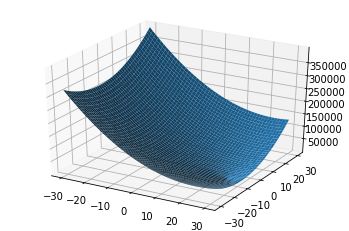

In [9]:
fig3d = plt.figure()
plt3d = fig3d.add_subplot(111, projection = '3d')
loss = np.zeros(theta1.shape)
lmin = 10**9
for i in range(len(theta1)):
    for j in range(len(theta2)):
        loss[i][j] = l_theta(np.vstack([theta1[i][j], theta2[i][j]]), x, y)
        lmin = min(lmin, loss[i][j])
plt3d.plot_surface(theta1, theta2, loss)
plt.show()

In [10]:
print(lmin)

1572.7835058203152
